In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
 
data = pd.read_csv("/kaggle/input/movie-openings/Top_Highest_Openings.csv")

 
data = data.fillna('')

 
data['content'] = data['Distributor'] + ' ' + data['Date']
 
vectorizer = CountVectorizer().fit_transform(data['content'])

 
cosine_sim = cosine_similarity(vectorizer)

 
def recommend_movies(title, cosine_sim=cosine_sim):
 
    idx = data[data['Release'] == title].index[0]

    
    sim_scores = list(enumerate(cosine_sim[idx]))

    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

   
    sim_scores = sim_scores[1:11]

 
    movie_indices = [i[0] for i in sim_scores]

   
    return data['Release'].iloc[movie_indices]

 
print(recommend_movies('Avengers: Endgame'))

80              Captain America: The Winter Soldier
2                            Avengers: Infinity War
6                                      The Avengers
8                                     The Lion King
14    Star Wars: Episode IX - The Rise of Skywalker
24                                   Captain Marvel
42                                        Frozen II
51                                      Toy Story 4
67                                  The Jungle Book
79                               The Little Mermaid
Name: Release, dtype: object


In [70]:
import pandas as pd
 
data_path = "/kaggle/input/movie-openings/Top_Highest_Openings.csv"   
movies_df = pd.read_csv(data_path)

 
movies_df = movies_df[["Release", "Total Gross"]]

 
sorted_movies = movies_df.sort_values(by="Total Gross", ascending=False)

 
num_recommendations = 10   

 
recommended_movies = sorted_movies.head(num_recommendations)

 
print("Recommended Movies (Popularity Based on Total Gross):")
for index, row in recommended_movies.iterrows():
    release_year = row["Release"]
    total_gross = row["Total Gross"]
    print(f"- Movie: {release_year}, Total Gross: ${total_gross:.2f}")   


Recommended Movies (Popularity Based on Total Gross):
- Movie: Star Wars: Episode VII - The Force Awakens, Total Gross: $936662225.00
- Movie: Avengers: Endgame, Total Gross: $858373000.00
- Movie: Spider-Man: No Way Home, Total Gross: $804793477.00
- Movie: Avatar, Total Gross: $749766139.00
- Movie: Top Gun: Maverick, Total Gross: $718732821.00
- Movie: Black Panther, Total Gross: $700059566.00
- Movie: Avatar: The Way of Water, Total Gross: $684075767.00
- Movie: Avengers: Infinity War, Total Gross: $678815482.00
- Movie: Jurassic World, Total Gross: $652270625.00
- Movie: Barbie, Total Gross: $636238421.00


Most similar movie to the first movie is:                                                 Release   Opening  Total Gross  \
1                              Spider-Man: No Way Home  0.711210     0.853929   
2                               Avengers: Infinity War  0.703942     0.714383   
4              Star Wars: Episode VIII - The Last Jedi  0.591708     0.649435   
7                                        Black Panther  0.538088     0.737916   
5                                       Jurassic World  0.558345     0.684980   
..                                                 ...       ...          ...   
928  Star Wars: Episode I - The Phantom Menace2012 ...  0.003446     0.010597   
741                                     All Eyez on Me  0.015255     0.012221   
957                         Diary of a Mad Black Woman  0.001764     0.018547   
969                                     Texas Chainsaw  0.001286     0.000501   
963                     Renaissance: A Film by Beyoncé  0.001455  

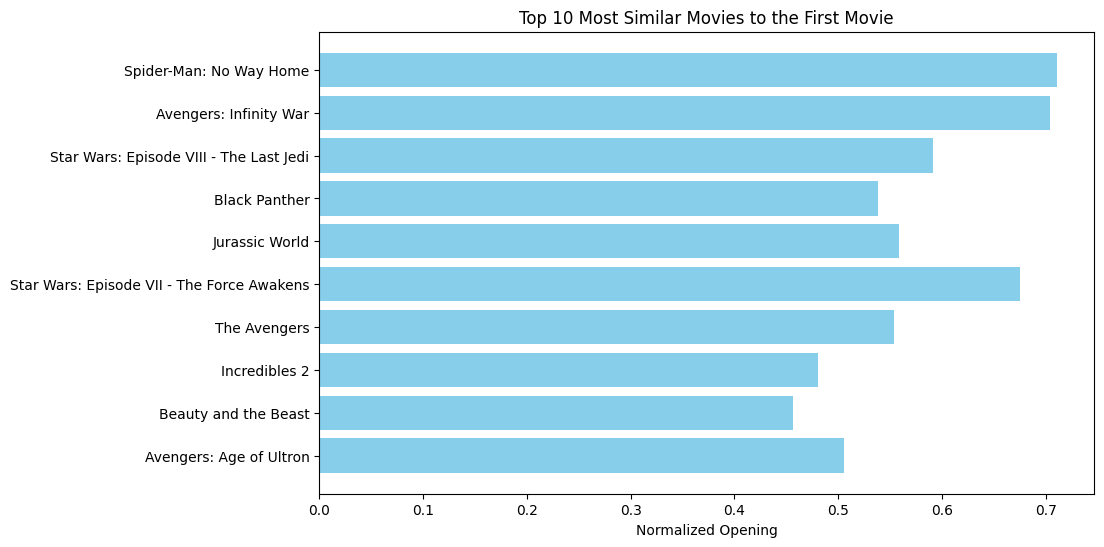

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

 
df = pd.read_csv('/kaggle/input/movie-openings/Top_Highest_Openings.csv')

 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

 
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

 
similarity_matrix = cosine_similarity(df[numeric_cols])
 
most_similar_movies = similarity_matrix[0].argsort()[::-1][1:]

 
top_10_similar_movies = df.iloc[similarity_matrix[0].argsort()[::-1][1:11]]

print("Most similar movie to the first movie is: ", df.iloc[most_similar_movies])

 
plt.figure(figsize=(10, 6))
plt.barh(top_10_similar_movies['Release'], top_10_similar_movies['Opening'], color='skyblue')
plt.xlabel('Normalized Opening')
plt.title('Top 10 Most Similar Movies to the First Movie')
plt.gca().invert_yaxis()   
plt.show()

Mean Squared Error: 19994759163375.977
R-squared: 0.9759738369544746


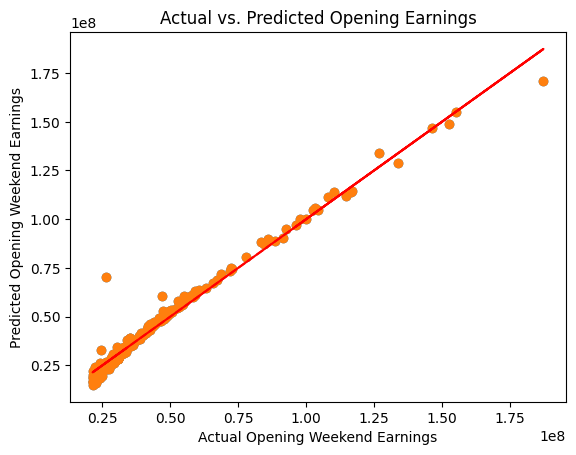

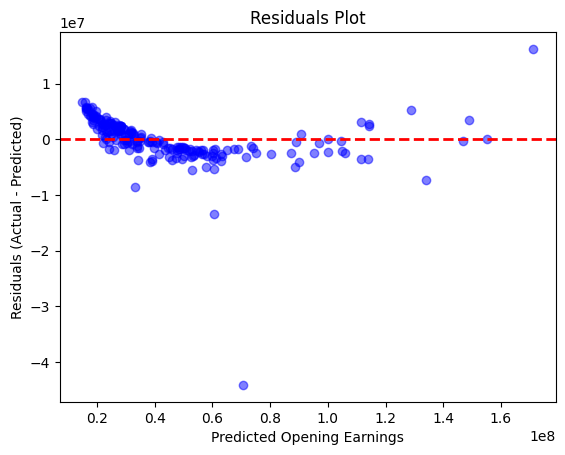

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, ndcg_score
 
data = pd.read_csv("/kaggle/input/movie-openings/Top_Highest_Openings.csv")
features = ["Theaters", "Total Gross", "% of Total", "Average"]
target = "Opening"

 
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.scatter(y_test, y_pred)

 
plt.plot(y_test, y_test, color='red', linestyle='-')

 
plt.scatter(y_test, y_pred)

 
plt.plot(y_test, y_test, color='red', linestyle='--')

 
plt.xlabel("Actual Opening Weekend Earnings")
plt.ylabel("Predicted Opening Weekend Earnings")
plt.title("Actual vs. Predicted Opening Earnings")

 
plt.show()

 
residuals = y_test - y_pred

 
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Opening Earnings')
plt.ylabel('Residuals (Actual - Predicted)')   
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)   
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Release      1000 non-null   object 
 1   Opening      1000 non-null   int64  
 2   Total Gross  1000 non-null   int64  
 3   % of Total   1000 non-null   float64
 4   Theaters     1000 non-null   int64  
 5   Average      1000 non-null   int64  
 6   Date         1000 non-null   object 
 7   Distributor  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


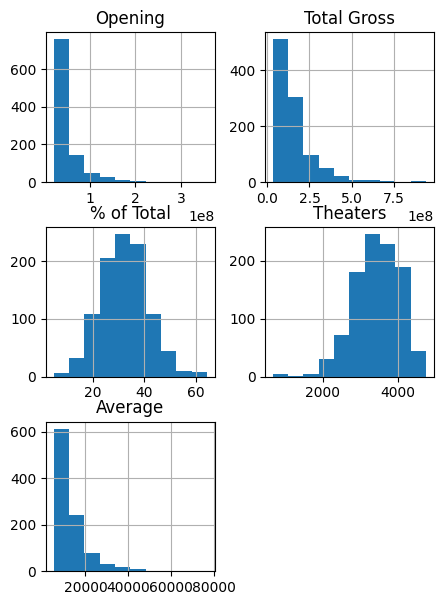

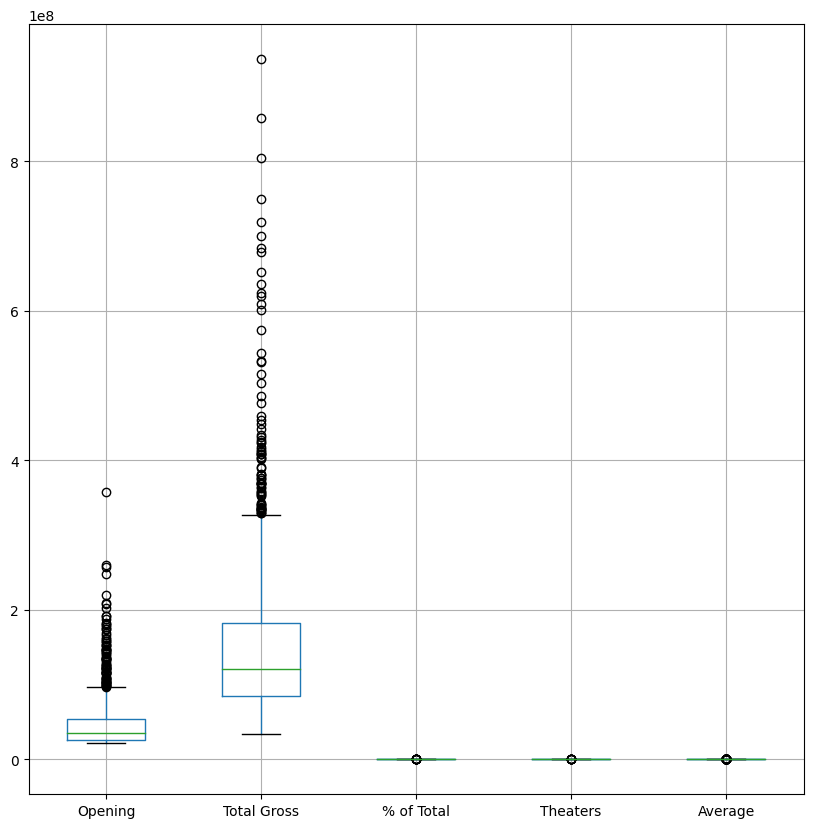

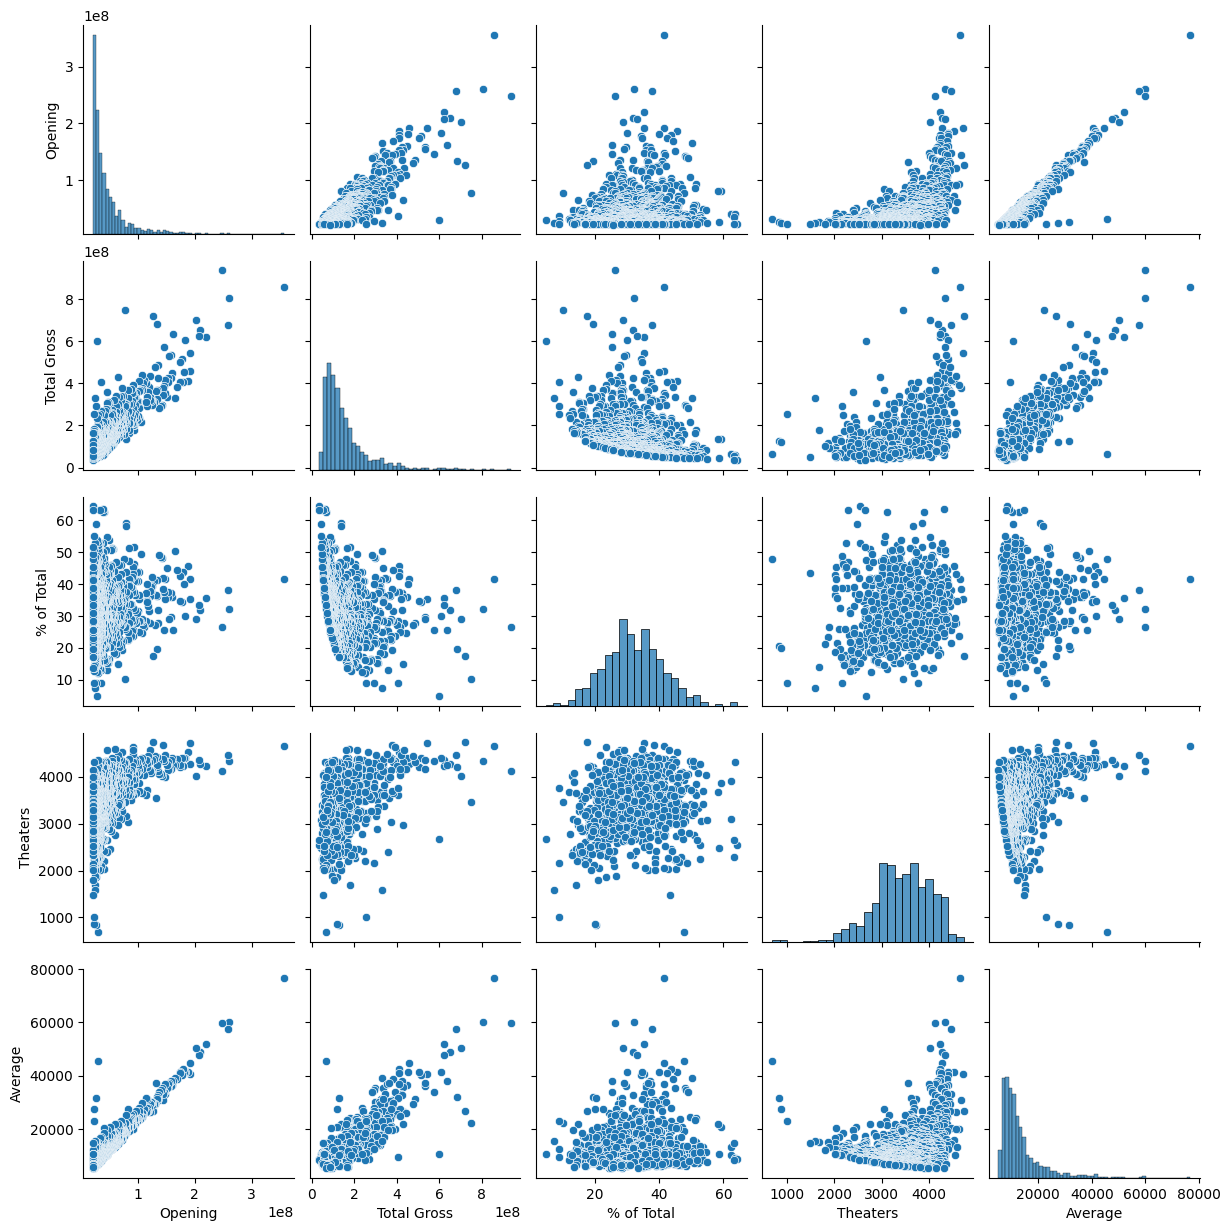

In [73]:
import warnings
warnings.filterwarnings("ignore")
df_info = data.info()
df_describe = data.describe().T
missing_values = data.isnull().sum()*100/len(data)
duplicated_values = data.duplicated()

data.hist(figsize=(5,7))
plt.show()
 
data.boxplot(figsize=(10,10))
plt.show()
 
sns.pairplot(data)
plt.show()

In [ ]:
# GUI representation of the dataset and model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tkinter import Tk, Button, Label, filedialog
from tkinter import messagebox   
class MLAnalysisModel:
    def __init__(self, root):
        self.root = root
        self.root.title("Movie Opening Analysis")
        self.root.geometry("500x500")
        self.root.configure(bg='black')

        self.df = None   

        self.load_button = Button(root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=20)

        self.train_button = Button(root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=20)

        self.visualize_button = Button(root, text="Visualize Results", command=self.visualize_results)
        self.visualize_button.pack(pady=20)

        self.info_label = Label(root, text="", font=("Arial", 12))
        self.info_label.pack(pady=20)

    def load_dataset(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                self.df = pd.read_csv(file_path)
                self.info_label.config(text="Dataset Loaded Successfully")
            except Exception as e:
                messagebox.showerror("Error", f"An error occurred while loading data: {str(e)}")

    def train_model(self):
        if self.df is None:
            self.info_label.config(text="Please load the dataset first")
            return

        try:
            features = ["Theaters", "Total Gross", "% of Total", "Average"]
            target = "Opening"

            X_train, X_test, y_train, y_test = train_test_split(self.df[features], self.df[target], test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            self.info_label.config(text=f"Model Trained Successfully. \nMean Squared Error: {mse:.2f}\nR-squared: {r2:.2f}")

        except Exception as e:
            self.info_label.config(text=f"An error occurred during training: {str(e)}")

    def visualize_results(self):
        if self.df is None:
            self.info_label.config(text="Please train the model first")
            return

        try:
            plt.scatter(y_test, y_pred)
            plt.plot(y_test, y_test, color='red', linestyle='-')
            plt.scatter(y_test, y_pred)
            plt.plot(y_test, y_test, color='red', linestyle='--')
            plt.xlabel("Actual Opening Weekend Earnings")
            plt.ylabel("Predicted Opening Weekend Earnings")
            plt.title("Actual vs. Predicted Opening Earnings")
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
            plt.xlabel('Predicted Opening Earnings')
            plt.ylabel('Residuals (Actual - Predicted)')
            plt.title('Residuals Plot')
            plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
            plt.show()

        except Exception as e:
            self.info_label.config(text=f"An error occurred during visualization: {str(e)}")


if __name__ == "__main__":
    root = Tk()
    app = MLAnalysisModel
    root.mainloop()